# Personal ID reader

In [1]:
# installing libraries
!pip install easyocr
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
# import the necessary packages
import os
from roboflow import Roboflow

from ultralytics import YOLO
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import easyocr
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#downloading annotated data from robofolw
rf = Roboflow(api_key="2P964pScqcEoY2A66mzG")
project = rf.workspace("yolo-1qokg").project("id-card-nseoe-bluzt")
version = project.version(1)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ID-Card-1 in yolov12:: 100%|██████████| 944/944 [00:00<00:00, 7134.71it/s]


# downloading and training the model on data

---



In [5]:
#choosing YOLO version
model = YOLO('yolo12s.pt')

results = model.train(data=f'{dataset.location}/data.yaml',imgsz=640,batch=16, epochs=100)

100%|██████████| 18.1M/18.1M [00:00<00:00, 140MB/s] 


Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/ID-Card-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretraine

100%|██████████| 755k/755k [00:00<00:00, 37.7MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  2    689408  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 4]        
  7                  -1  1   1180672  ultralytics

  8                  -1  2   2689536  ultralytics.nn.modules.block.A2C2f           [512, 512, 2, True, 1]        
  9                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 10             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 11                  -1  1    345856  ultralytics.nn.modules.block.A2C2f           [768, 256, 1, False, -1]      
 12                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 13             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 14                  -1  1     95104  ultralytics.nn.modules.block.A2C2f           [512, 128, 1, False, -1]      
 15                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 16            [-1, 11]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 115MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1547.1±631.1 MB/s, size: 44.0 KB)


train: Scanning /content/ID-Card-1/train/labels... 420 images, 0 backgrounds, 0 corrupt: 100%|██████████| 420/420 [00:00<00:00, 2327.44it/s]

train: New cache created: /content/ID-Card-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.1 ms, read: 590.0±390.2 MB/s, size: 39.7 KB)


val: Scanning /content/ID-Card-1/valid/labels... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<00:00, 1439.73it/s]

val: New cache created: /content/ID-Card-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.99G      2.138      4.023       1.83         31        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         38        152      0.838      0.799      0.928      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.28G      1.146      1.167        1.1         17        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         38        152      0.266      0.621      0.242      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.32G      1.097       0.95      1.043         29        640: 100%|██████████| 27/27 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         38        152      0.865      0.765      0.938      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.36G      1.032     0.8132      1.023         39        640: 100%|██████████| 27/27 [00:11<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         38        152       0.89      0.987      0.979      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       6.4G      1.021     0.7476     0.9954         45        640: 100%|██████████| 27/27 [00:12<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         38        152       0.91      0.962      0.993      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.44G     0.9812     0.6564      0.987         34        640: 100%|██████████| 27/27 [00:11<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]

                   all         38        152      0.969      0.999      0.992       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.46G      1.014     0.6586          1         42        640: 100%|██████████| 27/27 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         38        152      0.992          1      0.995      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.52G      1.021     0.6468      1.006         33        640: 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         38        152      0.949      0.991      0.993      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.55G     0.9266     0.5964     0.9709         18        640: 100%|██████████| 27/27 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

                   all         38        152      0.994          1      0.995       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.59G     0.8778     0.5579     0.9506         37        640: 100%|██████████| 27/27 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         38        152       0.99          1      0.995      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.61G     0.9081     0.5615     0.9567         34        640: 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         38        152      0.987          1      0.995      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.67G     0.8862     0.5601     0.9583         19        640: 100%|██████████| 27/27 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all         38        152      0.986      0.993      0.995      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.71G        0.9     0.5566     0.9551         36        640: 100%|██████████| 27/27 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         38        152      0.997          1      0.995      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.75G     0.8914     0.5522     0.9535         22        640: 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         38        152      0.995          1      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.77G     0.8925     0.5528     0.9536         17        640: 100%|██████████| 27/27 [00:11<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         38        152      0.996          1      0.995      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.83G     0.8578     0.5243     0.9467         28        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

                   all         38        152      0.993          1      0.995      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.87G      0.856      0.512     0.9455         32        640: 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         38        152      0.989          1      0.995      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       6.9G     0.8468      0.514     0.9429         28        640: 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         38        152      0.993          1      0.995      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.92G     0.8448     0.5106     0.9372         28        640: 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         38        152      0.991          1      0.995      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.98G     0.8588      0.503     0.9457         28        640: 100%|██████████| 27/27 [00:11<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         38        152      0.993          1      0.995      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.02G     0.8344     0.4969      0.938         35        640: 100%|██████████| 27/27 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         38        152      0.997          1      0.995      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.06G     0.8083     0.4888     0.9279         17        640: 100%|██████████| 27/27 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         38        152      0.995          1      0.995      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.08G     0.7882     0.4835     0.9306         17        640: 100%|██████████| 27/27 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         38        152      0.997          1      0.995      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.14G     0.8196     0.4841     0.9325         33        640: 100%|██████████| 27/27 [00:11<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         38        152      0.995          1      0.995        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.18G     0.8147      0.478      0.927         37        640: 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         38        152      0.998          1      0.995      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.21G     0.7911     0.4718     0.9197         28        640: 100%|██████████| 27/27 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         38        152      0.992          1      0.995      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.23G     0.7806     0.4637     0.9173         24        640: 100%|██████████| 27/27 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         38        152      0.998          1      0.995      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.29G     0.7754     0.4575     0.9099         28        640: 100%|██████████| 27/27 [00:11<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         38        152      0.995          1      0.995      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.33G     0.7872     0.4597     0.9253         40        640: 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

                   all         38        152      0.997          1      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.37G     0.7878     0.4497     0.9206         19        640: 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]

                   all         38        152      0.998          1      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.36G     0.7957     0.4542     0.9217         24        640: 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         38        152      0.998          1      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.36G     0.7671     0.4341     0.9152         25        640: 100%|██████████| 27/27 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         38        152      0.997          1      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.36G     0.7821      0.448      0.917         38        640: 100%|██████████| 27/27 [00:11<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]

                   all         38        152      0.997          1      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.36G     0.7599     0.4443     0.9107         33        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]

                   all         38        152      0.998          1      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.36G     0.7627     0.4435     0.9053         26        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]

                   all         38        152      0.998          1      0.995       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.36G     0.7677     0.4374     0.8999         37        640: 100%|██████████| 27/27 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         38        152      0.998          1      0.995      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.36G     0.7386     0.4215     0.9027         24        640: 100%|██████████| 27/27 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         38        152      0.997          1      0.995      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.38G      0.761     0.4278     0.9073         35        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         38        152      0.998          1      0.995      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       6.4G     0.7578     0.4245      0.914         12        640: 100%|██████████| 27/27 [00:11<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         38        152      0.997          1      0.995      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.46G      0.758     0.4311     0.9082         25        640: 100%|██████████| 27/27 [00:11<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.92it/s]

                   all         38        152      0.997          1      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       6.5G     0.7315     0.4316     0.8988         40        640: 100%|██████████| 27/27 [00:11<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]

                   all         38        152      0.997          1      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.54G     0.7252      0.417     0.9028         15        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         38        152      0.997          1      0.995      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.56G     0.7358     0.4175      0.906         32        640: 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         38        152      0.997          1      0.995      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.62G      0.724     0.4167     0.8942         34        640: 100%|██████████| 27/27 [00:11<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         38        152      0.997          1      0.995      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.66G     0.7409     0.4186     0.9068         30        640: 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         38        152      0.997          1      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       6.7G     0.6997     0.4047     0.8901         27        640: 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         38        152      0.998          1      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.71G     0.7195     0.4081     0.8876         33        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         38        152      0.997          1      0.995      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.77G     0.7333     0.4116     0.9004         29        640: 100%|██████████| 27/27 [00:12<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all         38        152      0.998          1      0.995      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.81G     0.7181     0.4022     0.8915         23        640: 100%|██████████| 27/27 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         38        152      0.997          1      0.995       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.85G     0.7352     0.4134     0.8925         31        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         38        152      0.998          1      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.87G     0.7188      0.409     0.8963         35        640: 100%|██████████| 27/27 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

                   all         38        152      0.996          1      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.93G     0.7116      0.402     0.9015         22        640: 100%|██████████| 27/27 [00:11<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         38        152      0.998          1      0.995      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.97G     0.7052     0.3904     0.8942         28        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         38        152      0.998          1      0.995      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.01G     0.6858     0.3849     0.8862         16        640: 100%|██████████| 27/27 [00:11<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         38        152      0.998          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.02G     0.6884     0.3834     0.8921         34        640: 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

                   all         38        152      0.998          1      0.995      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.12G     0.7048     0.3903     0.8933         28        640: 100%|██████████| 27/27 [00:11<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]

                   all         38        152      0.992          1      0.995      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.15G     0.6812     0.3757      0.883         29        640: 100%|██████████| 27/27 [00:11<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.34it/s]

                   all         38        152      0.998          1      0.995       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.19G     0.6868     0.3799     0.8824         23        640: 100%|██████████| 27/27 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         38        152      0.998          1      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.25G     0.6784     0.3768     0.8836         28        640: 100%|██████████| 27/27 [00:11<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]

                   all         38        152      0.997          1      0.995       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.31G     0.6702     0.3721     0.8811         16        640: 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all         38        152      0.997          1      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.35G     0.6842     0.3762     0.8792         17        640: 100%|██████████| 27/27 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         38        152      0.997          1      0.995      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.42G     0.6673     0.3677     0.8768         31        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]

                   all         38        152      0.998          1      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.35G     0.6751     0.3677     0.8852         38        640: 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]

                   all         38        152      0.999          1      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.35G     0.6882     0.3735     0.8867         25        640: 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         38        152      0.997          1      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.35G      0.689     0.3731     0.8861         24        640: 100%|██████████| 27/27 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]

                   all         38        152      0.998          1      0.995      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.35G     0.6685     0.3682     0.8771         28        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         38        152      0.998          1      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.35G      0.665     0.3642     0.8756         33        640: 100%|██████████| 27/27 [00:11<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

                   all         38        152      0.998          1      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.35G     0.6552     0.3585     0.8786         36        640: 100%|██████████| 27/27 [00:11<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.37it/s]

                   all         38        152      0.999          1      0.995      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.35G     0.6743     0.3681     0.8816         40        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]

                   all         38        152      0.998          1      0.995      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.38G     0.6469     0.3575     0.8725         26        640: 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         38        152      0.998          1      0.995      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       6.4G     0.6407     0.3503     0.8744         20        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all         38        152      0.997          1      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.45G     0.6422     0.3527      0.877         24        640: 100%|██████████| 27/27 [00:11<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]

                   all         38        152      0.998          1      0.995      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.49G     0.6475     0.3532     0.8843         31        640: 100%|██████████| 27/27 [00:12<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         38        152      0.998          1      0.995      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.53G     0.6353     0.3453     0.8671         22        640: 100%|██████████| 27/27 [00:13<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         38        152      0.998          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.55G     0.6387     0.3475     0.8676         48        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         38        152      0.998          1      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.61G     0.6549     0.3499     0.8762         19        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         38        152      0.998          1      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.65G     0.6277     0.3444     0.8708         23        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         38        152      0.998          1      0.995      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.69G      0.632     0.3393     0.8689         40        640: 100%|██████████| 27/27 [00:11<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         38        152      0.998          1      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.71G     0.6074     0.3347     0.8654         39        640: 100%|██████████| 27/27 [00:11<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]

                   all         38        152      0.998          1      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.76G     0.6201     0.3364     0.8669         25        640: 100%|██████████| 27/27 [00:12<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]

                   all         38        152      0.998          1      0.995      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       6.8G     0.6216     0.3351     0.8675         47        640: 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.92it/s]

                   all         38        152      0.998          1      0.995      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.84G     0.6133     0.3384     0.8663         56        640: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]

                   all         38        152      0.998          1      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.86G     0.6036      0.329     0.8687         34        640: 100%|██████████| 27/27 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]

                   all         38        152      0.998          1      0.995      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.92G     0.6064     0.3328     0.8665         28        640: 100%|██████████| 27/27 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]

                   all         38        152      0.998          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.96G     0.6186     0.3325     0.8657         37        640: 100%|██████████| 27/27 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.86it/s]

                   all         38        152      0.998          1      0.995      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         7G     0.6008     0.3234     0.8659         38        640: 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]

                   all         38        152      0.998          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.02G     0.6096     0.3289     0.8646         32        640: 100%|██████████| 27/27 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         38        152      0.998          1      0.995       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.11G     0.5928     0.3248      0.866         20        640: 100%|██████████| 27/27 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.10it/s]

                   all         38        152      0.998          1      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.15G     0.5968     0.3234     0.8613         20        640: 100%|██████████| 27/27 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

                   all         38        152      0.998          1      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.19G     0.5749     0.3138     0.8597         23        640: 100%|██████████| 27/27 [00:11<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all         38        152      0.998          1      0.995      0.861


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.24G     0.5427     0.2844     0.8281         16        640: 100%|██████████| 27/27 [00:12<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all         38        152      0.998          1      0.995      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.33G     0.5399     0.2874     0.8283         16        640: 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all         38        152      0.998          1      0.995      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.37G     0.5296     0.2822     0.8262         16        640: 100%|██████████| 27/27 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         38        152      0.998          1      0.995      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.36G     0.5387     0.2835     0.8273         16        640: 100%|██████████| 27/27 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]

                   all         38        152      0.998          1      0.995      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.36G     0.5278     0.2798     0.8303         16        640: 100%|██████████| 27/27 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]

                   all         38        152      0.998          1      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.36G     0.5213     0.2778     0.8279         16        640: 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         38        152      0.998          1      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.36G     0.5198     0.2748     0.8239         16        640: 100%|██████████| 27/27 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]

                   all         38        152      0.998          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.36G     0.5111     0.2743     0.8234         16        640: 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         38        152      0.998          1      0.995      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.36G     0.5149      0.273     0.8188         16        640: 100%|██████████| 27/27 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all         38        152      0.998          1      0.995      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.36G     0.5124     0.2699     0.8244         16        640: 100%|██████████| 27/27 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]

                   all         38        152      0.998          1      0.995      0.857



100 epochs completed in 0.360 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 18.9MB
Optimizer stripped from runs/detect/train/weights/best.pt, 18.9MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,232,428 parameters, 0 gradients, 21.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]


                   all         38        152      0.998          1      0.995      0.864
         Date_of_Birth         38         38      0.998          1      0.995      0.855
            First_Name         38         38      0.998          1      0.995      0.886
             ID_Number         38         38      0.998          1      0.995      0.856
             Last_Name         38         38      0.998          1      0.995      0.859
Speed: 0.3ms preprocess, 6.6ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train


# Testing and Evaluation

In [7]:
# getting the project directory
HOME = os.getcwd()
print(HOME)

/content


In [28]:
# loading model best weights
model_best = YOLO(f"{HOME}/runs/detect/train/weights/best.pt")


image 1/1 /content/ID-Card-1/test/images/389173_0_jpg.rf.12e10310b8b18cefd4c299b073ffe4c6.jpg: 480x640 1 Date_of_Birth, 1 First_Name, 1 ID_Number, 1 Last_Name, 18.8ms
Speed: 1.8ms preprocess, 18.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


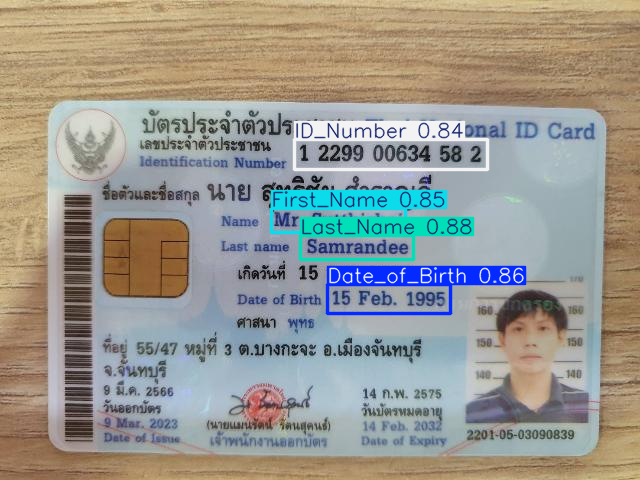

In [29]:
#testing and visualizing the model on an image
result = model_best(f"{HOME}/ID-Card-1/test/images/389173_0_jpg.rf.12e10310b8b18cefd4c299b073ffe4c6.jpg",conf=0.75,)
for results in result:
       results.show()

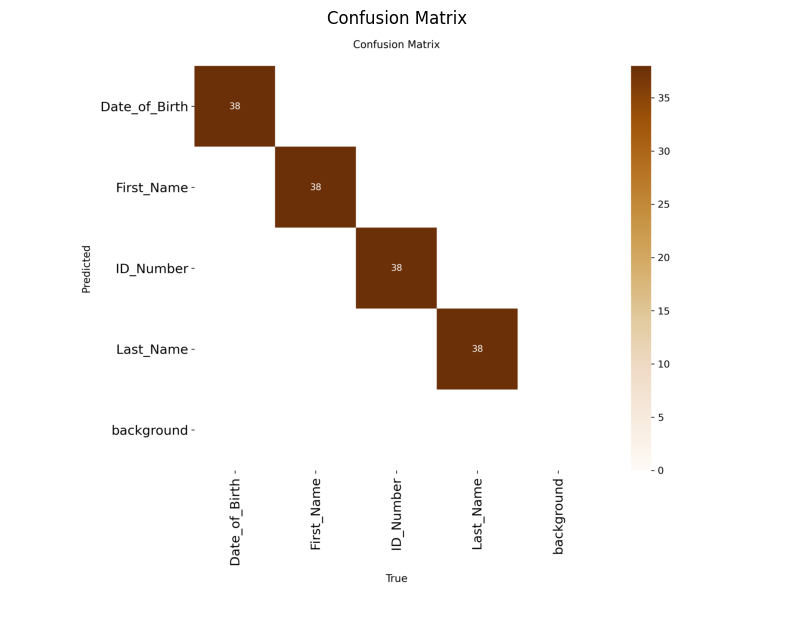

In [13]:
#ploting confusion matrix to Evaluat model
plt.figure(figsize=(10,10))
plt.imshow(cv2.imread(f'{HOME}/runs/detect/train/confusion_matrix.png'))
plt.title("Confusion Matrix")
plt.axis('off')
plt.show()

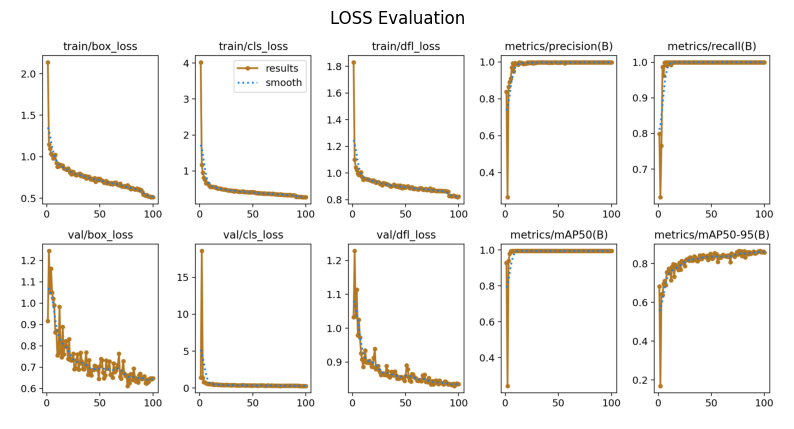

In [14]:
#visualizing Losses
plt.figure(figsize=(10,10))
plt.imshow(cv2.imread(f'{HOME}/runs/detect/train/results.png'))
plt.title("LOSS Evaluation")
plt.axis('off')
plt.show()

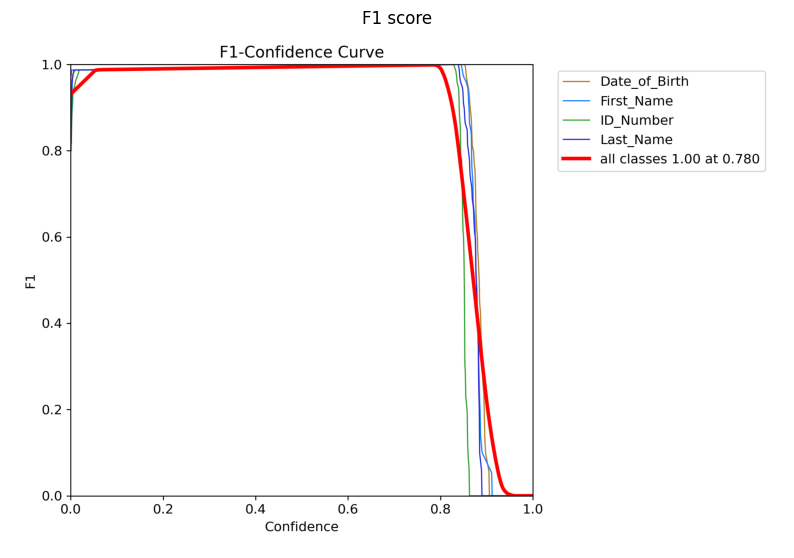

In [89]:
#visualizing F1 score
plt.figure(figsize=(10,10))
plt.imshow(cv2.imread(f'{HOME}/runs/detect/train/BoxF1_curve.png'))
plt.title("F1 score")
plt.axis('off')
plt.show()

# Processing results and applying EasyOCR

In [31]:
# getting classes names
for box in result[0].boxes:
    print(model_best.names[int(box.cls)])

Last_Name
Date_of_Birth
First_Name
ID_Number


In [99]:
"""
this function takes the image path apply the trained YOLO detection model
then crops the image to each bounding box to extract text from every Bbox
using EasyOCR and return a dictionary containing the extracted text(personal ID info)

"""
def extract_text (image_path):

    #setting EasyOCR to detect English text
    reader = easyocr.Reader(['en'])

    #appling Yolo detection model
    detect = model_best(image_path, conf=0.75)

    #reading image from path to crop
    image = Image.open(image_path)

    #this loop runs through the detected bboxes crops the image to it and apply EasyOCR
    for box in detect[0].boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        cropped_image = image.crop((x1, y1, x2, y2))
        cropped_image_np = np.array(cropped_image)
        ocr_result = reader.readtext(cropped_image_np)
        #reading the bbox class name
        detected_class_name = model_best.names[int(box.cls)]

        #saving the text in the detected class name
        if detected_class_name == 'First_Name':
          First_Name = " ".join([text for (bbox, text, prob) in ocr_result])
        elif detected_class_name == 'Last_Name':
          Last_Name = " ".join([text for (bbox, text, prob) in ocr_result])
        elif detected_class_name == 'ID_Number':
          ID_Number = " ".join([text for (bbox, text, prob) in ocr_result])
        elif detected_class_name == 'Date_of_Birth':
          Date_of_Birth = " ".join([text for (bbox, text, prob) in ocr_result])

    #creating a dictionary with all the ID info
    extracted_text = {'First_Name': First_Name,
                      'Last_Name': Last_Name,
                      'ID_Number': ID_Number,
                      'Date_of_Birth': Date_of_Birth
                      }

    return extracted_text

In [95]:
# creating new dataframe to save the the ID info
data = {
    'First_Name': [],
    'Last_Name': [],
    'ID_Number': [],
    'Date_of_Birth': []
}
df = pd.DataFrame(data)

In [96]:
#reading all test images and saving all ther path into a list
image_directory = f'{HOME}/ID-Card-1/test/images'
test_images = [os.path.join(image_directory, f) for f in os.listdir(image_directory) if f.endswith(('.jpg', '.jpeg', '.png'))]

#This loop iterates through the test_images paths, applying the extract_text function to each image, and then saving the result in the DataFrame
for image_path in test_images:
  personal_ID = extract_text(image_path)
  df = pd.concat([df, pd.DataFrame([personal_ID])], ignore_index=True)


image 1/1 /content/ID-Card-1/test/images/OCR_20240823_142145_0_jpg.rf.d4a08b9b227b7a452fdbc72449d9d6c2.jpg: 480x640 1 Date_of_Birth, 1 First_Name, 1 ID_Number, 1 Last_Name, 19.8ms
Speed: 2.2ms preprocess, 19.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/ID-Card-1/test/images/OCR_20240823_120234_0_jpg.rf.260176180e5a9bee0a707a2028c7bc2a.jpg: 480x640 1 Date_of_Birth, 1 First_Name, 1 ID_Number, 1 Last_Name, 19.4ms
Speed: 1.5ms preprocess, 19.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/ID-Card-1/test/images/389177_0_jpg.rf.cdd2d11e19fae4b4dba00fc04f030cc7.jpg: 640x480 1 Date_of_Birth, 1 First_Name, 1 ID_Number, 1 Last_Name, 20.6ms
Speed: 2.0ms preprocess, 20.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/ID-Card-1/test/images/389183_0_jpg.rf.ffec587ba56a15560cb4cc449b58d036.jpg: 480x640 1 Date_of_Birth, 1 First_Name, 1 ID_Number, 1 Last_Name, 16.5ms
Speed: 1.5m

In [97]:
#DataFrame preview
df

,First_Name,Last_Name,ID_Number,Date_of_Birth
0,Miss Anyanat,Rakphan,1 1005 01575 58 5,31 Aug. 2001
1,Mr. Tanawat,Rabalerth,1 1042 00157 90,28 May 2000
2,"Mr, Oatsanl",Koedsamran,4098 00292 16 5,27 Oct; 1995
3,Mr; Pongsakorn,Fang-am,1706 00175 17 8,27 May 1999
4,Mr. Chatchawan,Wapsanthla,1 3009 01218 4~,24 Nov. 2001
5,Mr; Plcha,Patreneramalt,1 1037 01822 85 6,Nov. 1935
6,Mr. Sutthichai,Samrandee,1 2299 00634 58 2,15 Feb. 1995
7,Mlss Arphaporn,Namtrong,1 3415 01380 56 2,8 Apr. 2001


In [87]:
#Exporting and saving DataFrame into a CSV file
df.to_csv('extracted_personal_IDs.csv', index=False)